In [1]:
#########################################
########### BASELINE CODE ###############
#########################################
#library imports
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image, ImageOps
import requests

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#start of computation
epl_strikers_df = pd.read_csv("data/epl_top_strikers_2020_2021.csv")
#convert columns to integers
columns_to_convert_to_ints = ['stats.shots.shots_total','stats.shots.shots_on_goal','stats.goals.scored','stats.passing.total_crosses','stats.passing.crosses_accuracy','stats.passing.passes','stats.passing.accurate_passes','stats.passing.passes_accuracy','stats.passing.key_passes','stats.dribbles.attempts','stats.dribbles.success','stats.dribbles.dribbled_past','stats.other.aerials_won','stats.other.offsides','stats.other.hit_woodwork','stats.other.minutes_played']
    
epl_strikers_df[columns_to_convert_to_ints] = epl_strikers_df[columns_to_convert_to_ints].astype('Int64')

In [4]:
def get_and_display_player_image(player):   
    df = epl_strikers_df
    image_url = df[df['player_name'] == player]['player_image_path'].values[0]
    image = ImageOps.expand(Image.open(requests.get(image_url, stream=True).raw),border=2,fill='black')
    image = image.resize((200, 200))
    
    display(image)
    
    
def apply_consistent_style(fig):
    fig.update_yaxes(showgrid=False)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(title_font=dict(size=16, color='white'), tickfont=dict(family='Courier', color='white', size=14))
    fig.update_xaxes(title_font=dict(size=16, color='white'), tickfont=dict(family='Courier', color='white', size=14))
    fig.update_layout(title_font=dict(size=18, family='Arial'),   title_x=0.5, title_font_color='white',   margin=dict(l=5,r=5,b=10,t=50,pad=0))
    
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0.5)', 'paper_bgcolor': 'rgba(0, 0, 0, 0.3)'})
    
    return fig

def plot_horizontal_bar(player):
    df = epl_strikers_df
    df = df.groupby(['player_name'])['stats.goals.scored'].sum().sort_values(ascending = True)
    df = df.reset_index()
    
    x = df['stats.goals.scored'].tolist()
    y = df['player_name'].tolist()
    
    fig = px.bar(df, 
                 x=x,
                 y=y, 
                 orientation='h',
                 title='Top Goal Scorers - EPL 2020/2021 - Up to Game Week ' + str(df.shape[0]),
                 height=400,
                 text=x,
                 labels={'x':'Goals', 'y':'Player Name'})
    
    fig.update_traces(hovertemplate=None, hoverinfo='skip')
    fig.update_layout(xaxis_title="Goals Scored", yaxis_title="Player", plot_bgcolor="#FAFAFA")
   
    fig.update_traces(textposition='outside', textfont={'color': 'white'})
    colours = ['blue',] * df.shape[0]
    colours[df[df['player_name'] == player].index[0]] = 'crimson'
    fig.update_traces(marker_color=colours)
    
    
    fig = apply_consistent_style(fig)
    
    fig.update_yaxes(title_font=dict(size=16, color='white'), tickfont=dict(family='Courier', color='white', size=12))
    fig.update_xaxes(title_font=dict(size=16, color='white'), tickfont=dict(family='Courier', color='white', size=14))
    
    fig.show(config={"displayModeBar": False, "showTips": False});
    
    
def plot_line_plot(player):
    df = epl_strikers_df
    x = df[df['player_name'] == player][['stats.shots.shots_total', 'fixture_string']]['fixture_string']
    y = df[df['player_name'] == player][['stats.shots.shots_total', 'fixture_string']]['stats.shots.shots_total']
    y1 = df[df['player_name'] == player][['stats.shots.shots_on_goal', 'fixture_string']]['stats.shots.shots_on_goal']
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers', name="Taken"))
    
    fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name="On Target"))
    
    fig.update_layout(title= player + " Shots Per Game - 2020/2021",
                      height=400, 
                      xaxis_title="Fixture Date", 
                      yaxis_title="Shots Taken/On Target")
    
    fig.update_xaxes(tickangle=-60,
                 tickmode = 'array',
                 tickvals = x,
                 ticktext= [y[-11:-1] for y in x])
    
    
    fig.update_layout(hovermode="x unified")
    fig.update_layout(hoverlabel=dict(bgcolor="white",font_size=12,font_family="Rockwell"))
    fig.update_layout(showlegend=False)
    
    fig = apply_consistent_style(fig)
    
    fig.show(config={"displayModeBar": False, "showTips": False});
    
    
    
def plot_scatter_plot(player):
    df = epl_strikers_df
    x = df[df['player_name'] == player]['stats.passing.accurate_passes'] 
    y = df[df['player_name'] == player]['stats.passing.passes']
    
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    
    fig = px.scatter(df, 
                     x=x,
                     y=y, 
                     title= player + " Attempted Passes vs. Accurate Passes - 2020/2021",
                     height=400,
                     labels={'x':'Completed', 'y':'Attempted'}, trendline='ols', trendline_color_override="red")
    fig.update_layout(xaxis_title="Accurate Passes", yaxis_title="Attempted Passes")
    fig.update_traces(marker_color='blue')
    fig = apply_consistent_style(fig)
    fig.update_xaxes(showgrid=True)
    fig.update_yaxes(showgrid=True)
    
    fig.show(config={"displayModeBar": False, "showTips": False});

In [5]:
###############################################
############# PANEL-SPECIFIC CODE #############
###############################################

In [6]:
def get_and_display_player_image(player):   
    df = epl_strikers_df
    image_url = df[df['player_name'] == player]['player_image_path'].values[0]
    image = ImageOps.expand(Image.open(requests.get(image_url, stream=True).raw),border=2,fill='black')
    image = image.resize((200, 200))

    #Panel change
    return image
    
def apply_consistent_style(fig):
    fig.update_yaxes(showgrid=False)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(title_font=dict(size=16, color='white'), tickfont=dict(family='Courier', color='white', size=14))
    fig.update_xaxes(title_font=dict(size=16, color='white'), tickfont=dict(family='Courier', color='white', size=14))
    fig.update_layout(title_font=dict(size=18, family='Arial'),   title_x=0.5, title_font_color='white',   margin=dict(l=5,r=5,b=10,t=50,pad=0))
    
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0.5)', 'paper_bgcolor': 'rgba(0, 0, 0, 0.3)'})
    
    return fig

def plot_horizontal_bar(player):
    df = epl_strikers_df
    df = df.groupby(['player_name'])['stats.goals.scored'].sum().sort_values(ascending = True)
    df = df.reset_index()
    
    x = df['stats.goals.scored'].tolist()
    y = df['player_name'].tolist()
    
    fig = px.bar(df, 
                 x=x,
                 y=y, 
                 orientation='h',
                 title='Top Goal Scorers - EPL 2020/2021 - Up to Game Week ' + str(df.shape[0]),
                 height=400,
                 width=1300, #Panel change
                 text=x,
                 labels={'x':'Goals', 'y':'Player Name'})
    fig.update_traces(hovertemplate=None, hoverinfo='skip')
    fig.update_layout(xaxis_title="Goals Scored", yaxis_title="Player", plot_bgcolor="#FAFAFA")
   
    fig.update_traces(textposition='outside', textfont={'color': 'white'})
    colours = ['blue',] * df.shape[0]
    colours[df[df['player_name'] == player].index[0]] = 'crimson'
    fig.update_traces(marker_color=colours)
    
    
    fig = apply_consistent_style(fig)
    
    fig.update_yaxes(title_font=dict(size=16, color='white'), tickfont=dict(family='Courier', color='white', size=12))
    fig.update_xaxes(title_font=dict(size=16, color='white'), tickfont=dict(family='Courier', color='white', size=14))
    

    #Panel change
    return fig
    
    
def plot_line_plot(player):
    df = epl_strikers_df
    x = df[df['player_name'] == player][['stats.shots.shots_total', 'fixture_string']]['fixture_string']
    y = df[df['player_name'] == player][['stats.shots.shots_total', 'fixture_string']]['stats.shots.shots_total']
    y1 = df[df['player_name'] == player][['stats.shots.shots_on_goal', 'fixture_string']]['stats.shots.shots_on_goal']
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers', name="Taken"))
    
    fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines+markers', name="On Target"))
    
    fig.update_layout(title= player + " Shots Per Game - 2020/2021",
                      height=400, 
                      width=890, #Panel change
                      xaxis_title="Fixture Date", 
                      yaxis_title="Shots Taken/On Target")
    
    fig.update_xaxes(tickangle=-60,
                 tickmode = 'array',
                 tickvals = x,
                 ticktext= [y[-11:-1] for y in x])
    
    
    fig.update_layout(hovermode="x unified")
    fig.update_layout(hoverlabel=dict(bgcolor="white",font_size=12,font_family="Rockwell"))
    fig.update_layout(showlegend=False)
    
    fig = apply_consistent_style(fig)
    
    #Panel change
    return fig
    
    
    
def plot_scatter_plot(player):
    df = epl_strikers_df
    x = df[df['player_name'] == player]['stats.passing.accurate_passes'] 
    y = df[df['player_name'] == player]['stats.passing.passes']
    
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    
    fig = px.scatter(df, 
                     x=x,
                     y=y, 
                     title= player + " Attempted Passes vs. Accurate Passes - 2020/2021",
                     height=400,
                     width=900, #Panel change
                     labels={'x':'Completed', 'y':'Attempted'}, trendline='ols', trendline_color_override="red")
    fig.update_layout(xaxis_title="Accurate Passes", yaxis_title="Attempted Passes")
    fig.update_traces(marker_color='blue')
    fig = apply_consistent_style(fig)
    fig.update_xaxes(showgrid=True)
    fig.update_yaxes(showgrid=True)
    
    #Panel change
    return fig

In [7]:
#raw css to alter base styles of some dashboard elements
css = '''
body {
  background-image: url("https://www.lefthudson.com/wp-content/uploads/2019/11/soccer-field-wallpapers-lovely-backgrounds-real-madrid-2017-wallpaper-cave-this-week-of-soccer-field-wallpapers.jpg");
  background-size: cover;
}

.player_select_row {
    color: white;
    font-size: 15px;
}
'''

In [8]:
#panel import
import panel as pn
#load the 'plotly' extension and include our css code above
pn.extension('plotly', raw_css=[css])

In [9]:
player_select_widget = pn.widgets.Select(options=list(epl_strikers_df['player_name'].unique()), 
                                         value='Bruno Fernandes', min_width=1600, max_width=1800)

#assign css class to achieve better design granularity
player_select_row = pn.Row('Choose A Player for Analysis:', player_select_widget, align='center', css_classes=['player_select_row'])

In [10]:
#Panel HTML elements can take a 'style' parameter directly.
#You could alternatively assign a css class as above and include the css code in raw_css
title_html_pane = pn.pane.HTML("""
<h1>Panel Soccer Analytics Dashboard</h1>
""", style={'color': 'white', 'width': '90%', 'text-align': 'center'})

In [11]:
#bind the 'player_select_widget' to our functions above 
bound_player_png_image_pane = pn.bind(get_and_display_player_image, player=player_select_widget)
bound_plotly_h_bar_pane = pn.bind(plot_horizontal_bar, player=player_select_widget)
bound_plotly_line_plot_pane = pn.bind(plot_line_plot, player=player_select_widget)
bound_plotly_scatter_plot_pane = pn.bind(plot_scatter_plot, player=player_select_widget)

In [12]:
#create a new gridspec with 14 columns and 12 rows
gspec = pn.GridSpec(ncols=14, nrows=12, sizing_mode='stretch_both', css_classes=['gspec_container'])

#place application elements in the grid, using pn.Spacer() for improved layout spacing and control
gspec[0, :14] = title_html_pane
gspec[1, :14] = player_select_row

gspec[3:6, 1:3] = bound_player_png_image_pane
gspec[2:7, 3] = pn.Spacer()

gspec[2:7, 4:14] = bound_plotly_h_bar_pane
gspec[7:10, 0:7] = bound_plotly_line_plot_pane
gspec[7:10, 7:14] = bound_plotly_scatter_plot_pane
gspec[11, 0:14] = pn.Spacer()

GridSpec(css_classes=['gspec_container'], ncols=14, nrows=12, sizing_mode='stretch_both')
    [0] HTML(str, sizing_mode='stretch_both', style={'color': 'white', ...})
    [1] Row(align='center', css_classes=['player_select_row'], sizing_mode='stretch_both')
        [0] Markdown(str)
        [1] Select(max_width=1800, min_width=1600, options=['Harry Kane', ...], value='Bruno Fernandes')
    [2] ParamFunction(function, sizing_mode='stretch_both')
    [3] Spacer(sizing_mode='stretch_both')
    [4] ParamFunction(function, sizing_mode='stretch_both')
    [5] ParamFunction(function, sizing_mode='stretch_both')
    [6] ParamFunction(function, sizing_mode='stretch_both')
    [7] Spacer(sizing_mode='stretch_both')
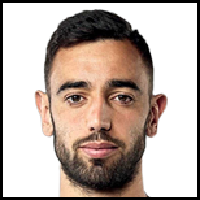

In [13]:
#To turn a notebook into a deployable app simply append .servable() to one or more Panel objects
gspec.servable()